In [143]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
import pandas as pd
import basicfunc as bbb

importlib.reload(bbb)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\imaging\\basicfunc.py'>

In [144]:
k = 1

# calibrazione

In [145]:
D1 = uproot.open('data_imaging\\group23_22Na_D1_10min_definitivo\\RAW\\DataR_CH0@DT5720B_781_group23_22Na_D1_10min_definitivo.root')
D2 = uproot.open('data_imaging\\group23_22Na_D2_10min_definitivo_sicuri\\RAW\\DataR_CH1@DT5720B_781_group23_22Na_D2_10min_definitivo_sicuri.root')
D3 = uproot.open('data_imaging\\group23_22Na_D3_10min_def\\RAW\\DataR_CH2@DT5720B_781_group23_22Na_D3_10min_def.root')
D4 = uproot.open('data_imaging\\group23_22Na_D4_10min_def\\RAW\\DataR_CH3@DT5720B_781_group23_22Na_D4_10min_def.root')
D5 = uproot.open('data_imaging\\group23_22Na_D5_10min_def\\RAW\\DataR_CH0@DT5720B_467_group23_22Na_D5_10min_def.root')
D6 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH1@DT5720B_467_group23_22Na_D6_10min_def.root')
D7 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH2@DT5720B_467_group23_22Na_D6_10min_def.root')
D8 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH3@DT5720B_467_group23_22Na_D6_10min_def.root')

In [146]:
d1 = np.asarray(D1['Data_R;1']['Energy'].array())
d2 = np.asarray(D2['Data_R;2']['Energy'].array())
d3 = np.asarray(D3['Data_R;2']['Energy'].array())
d4 = np.asarray(D4['Data_R;2']['Energy'].array())
d5 = np.asarray(D5['Data_R;3']['Energy'].array())
d6 = np.asarray(D6['Data_R;3']['Energy'].array())
d7 = np.asarray(D7['Data_R;2']['Energy'].array())
d8 = np.asarray(D8['Data_R;2']['Energy'].array())


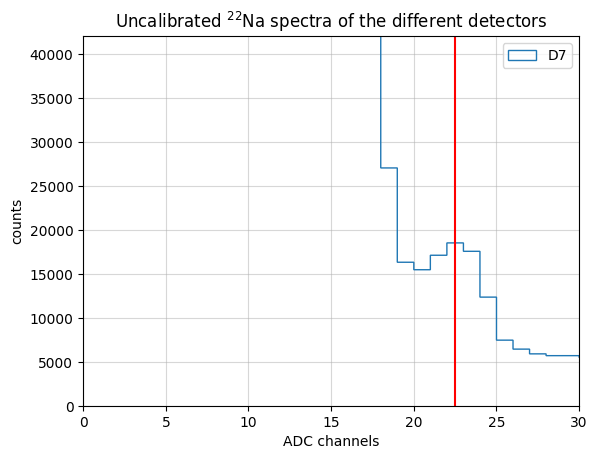

In [147]:
# plt.hist(d1, bins=int(d1.max()), histtype='step', label='D1')
# plt.hist(d2, bins=int(d2.max()), histtype='step', label='D2')
# plt.hist(d3, bins=int(d3.max()), histtype='step', label='D3')
# plt.hist(d4, bins=int(d4.max()), histtype='step', label='D4')
# plt.hist(d5, bins=int(d5.max()), histtype='step', label='D5')
# plt.hist(d6, bins=int(d6.max()), histtype='step', label='D6')
plt.hist(d7, bins=int(d7.max()), histtype='step', label='D7')
# plt.hist(d8, bins=int(d8.max()), histtype='step', label='D8')
plt.axvline(x=22.5, color='red')
# plt.axvline(x=50, color='red')
plt.title(r'Uncalibrated $^{22}$Na spectra of the different detectors')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.ylim(0, 42000)
plt.xlim(0, 30)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [148]:
print('D1 \nCompton')
# d1normCom = bbb.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the of $^{22}$Na', xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2)
print('Primo picco:')
d1norm1 = bbb.normal(d1, xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=k)
print('Secondo picco:')
d1norm2 = bbb.normal(d1, xmin=1400, xmax=2000, x1=0, x2=3000, b=int(d1.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D2 \nPrimo picco')
d2norm1 = bbb.normal(d2, xmin=600, xmax=950, x1=0, x2=3000, b=int(d2.max()), n=k)
print('Secondo picco')
d2norm2 = bbb.normal(d2,  xmin=1750, xmax=2300, x1=0, x2=3000, b=int(d2.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D3 \nPrimo Picco')
d3norm1 = bbb.normal(d3, xmin=170, xmax=300, x1=0, x2=3000, b=int(d3.max()), n=k)
print('Secondo picco')
d3norm2 = bbb.normal(d3, xmin=520, xmax=700, x1=0, x2=3000, b=int(d3.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D4 \nPrimo picco')
d4norm1 = bbb.normal(d4, xmin=320, xmax=570, x1=0, x2=3000, b=int(d4.max()), n=k)
print('Secondo picco')
d4norm2 = bbb.normal(d4, xmin=1000, xmax=1350, x1=0, x2=3000, b=int(d4.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d5norm1 = bbb.normal(d5, xmin=150, xmax=300, x1=0, x2=3000, b=int(d5.max()), n=k)
print('Secondo picco')
d5norm2 = bbb.normal(d5, xmin=480, xmax=680, x1=0, x2=3000, b=int(d5.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D6 \nPrimo picco')
d6norm1 = bbb.normal(d6, xmin=350, xmax=580, x1=0, x2=3000, b=int(d6.max()), n=k)
print('Secondo picco')
d6norm2 = bbb.normal(d6, xmin=1100, xmax=1450, x1=0, x2=3000, b=int(d6.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D7 \nPrimo picco')
d7norm1 = bbb.normal(d7, xmin=20, xmax=26, x1=0, x2=200, b=int(d7.max()), n=k)
print('Secondo picco')
d7norm2 = bbb.normal(d7, xmin=140, xmax=200, x1=200, x2=800, b=int(d7.max()), n=k)
print('______________________________________________________________________________________________________________')
print('D8 \nPrimo picco')
d8norm1 = bbb.normal(d8, xmin=110, xmax=200, x1=50, x2=250, b=int(d8.max()), n=k)
print('Secondo picco')
d8norm2 = bbb.normal(d8, xmin=300, xmax=450, x1=200, x2=500, b=int(d8.max()), n=k)

D1 
Compton
Primo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 338109.3599060629 ± 1905.151088414951
Media = 616.0207899885756 ± 0.4835257283466749
Sigma = 110.79018891855962 ± 0.8060963475372384
Chi-quadro = 357.134863942679
Chi-quadro ridotto = 1.445890137419753
Integrale dell'istogramma nel range [505.230601070016, 726.8109789071352] = 230788 ± 480
Secondo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 43765.79421203449 ± 299.57369506237745
Media = 1624.6067070564497 ± 1.2564103943678144
Sigma = 168.99294309209205 ± 1.4516617266924874
Chi-quadro = 662.171225457022
Chi-quadro ridotto = 1.1091645317538057
Integrale dell'istogramma nel range [1455.6137639643578, 1793.5996501485417] = 29814 ± 172
______________________________________________________________________________________________________________
D2 
Primo picco
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 

Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.7574962004433666 ± 0.0015822020251721697
Intercetta (q) = 44.36659218904066 ± 1.0350907569265246
Chi-squared= 1.5369234634999633e-18
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.631641346893913 ± 0.0003609030711236539
Intercetta (q) = 22.201632035585305 ± 0.28713120187355545
Chi-squared= 5.705489716034212e-17
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 2.121317450816527 ± 0.00027138444246053875
Intercetta (q) = 11.822421778864964 ± 0.06852605098058366
Chi-squared= 3.642388148156892e-17
Non ha senso calcolare il chi2 r

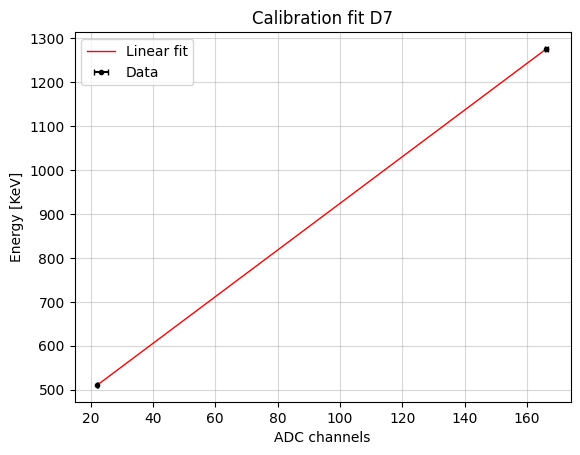

__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 3.7099622896227307 ± 0.012479347739066659
Intercetta (q) = 20.763927857723502 ± 1.8734464954178056
Chi-squared= 2.280229621993641e-19
Non ha senso calcolare il chi2 ridotto


In [149]:
y_calib = np.array([511, 1275]) #KeV
#__________________________________________________________________________________________________________
xD1 = np.array([d1norm1[0][1], d1norm2[0][1]])
sxD1 = np.array([d1norm1[1][1], d1norm2[1][1],])
calibrazioneD1 = bbb.linear_regression(xD1, y_calib, sx=sxD1, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D1')
print('__________________________________________________________________________________________________________')
xD2 = np.array([d2norm1[0][1], d2norm2[0][1]])
sxD2 = np.array([d2norm1[1][1], d2norm2[1][1],])
calibrazioneD2 = bbb.linear_regression(xD2, y_calib, sx=sxD2, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D2')
print('__________________________________________________________________________________________________________')
xD3 = np.array([d3norm1[0][1], d3norm2[0][1]])
sxD3 = np.array([d3norm1[1][1], d3norm2[1][1],])
calibrazioneD3 = bbb.linear_regression(xD3, y_calib, sx=sxD3, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D3')
print('__________________________________________________________________________________________________________')
xD4 = np.array([d4norm1[0][1], d4norm2[0][1]])
sxD4 = np.array([d4norm1[1][1], d4norm2[1][1],])
calibrazioneD4 = bbb.linear_regression(xD4, y_calib, sx=sxD4, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D4')
print('__________________________________________________________________________________________________________')
xD5 = np.array([d5norm1[0][1], d5norm2[0][1]])
sxD5 = np.array([d5norm1[1][1], d5norm2[1][1],])
calibrazioneD5 = bbb.linear_regression(xD5, y_calib, sx=sxD5, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D5')
print('__________________________________________________________________________________________________________')
xD6 = np.array([d6norm1[0][1], d6norm2[0][1]])
sxD6 = np.array([d6norm1[1][1], d6norm2[1][1],])
calibrazioneD6 = bbb.linear_regression(xD6, y_calib, sx=sxD6, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D6')
print('__________________________________________________________________________________________________________')
y_calib_7 = np.array([])
xD7 = np.array([d7norm1[0][1], d7norm2[0][1]])
sxD7 = np.array([d7norm1[1][1], d7norm2[1][1],])
calibrazioneD7 = bbb.linear_regression(xD7, y_calib, sx=sxD7, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D7', plot='yes')
print('__________________________________________________________________________________________________________')
xD8 = np.array([d8norm1[0][1], d8norm2[0][1]])
sxD8 = np.array([d8norm1[1][1], d8norm2[1][1],])
calibrazioneD8 = bbb.linear_regression(xD8, y_calib, sx=sxD8, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D8')


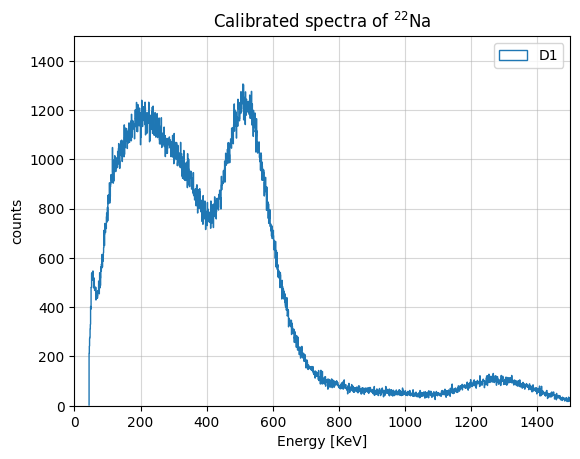

In [150]:
d1_calib = d1*calibrazioneD1[0]+calibrazioneD1[1]
plt.hist(d1_calib, bins=int(d1.max()), histtype='step', label='D1')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 1500)
plt.xlim(0, 1500)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# samples

In [151]:
l = 250 #mm
h = 15 #mm
g = 5 #mm
s = np.array([3*g+5/2*h, 2*g+3/2*h, g+1/2*h, -1/2*h, -g-3/2*h, -2*g-5/2*h, -3*g-7/2*h])
theta_max = []
theta_min = []
for i in range(7):
    theta_max.append(np.arctan((s[i]+h)/l))
    theta_min.append(np.arctan(s[i]/l))
theta_max = np.array(theta_max)
theta_min = np.array(theta_min)
x0 = 5 #mm
x_eff = x0/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))

## HOME

In [152]:
home_d1 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_781_group23_home_30min.root')
home_d2 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_781_group23_home_30min.root')
home_d3 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_781_group23_home_30min.root')
home_d4 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_781_group23_home_30min.root')
home_d5 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_467_group23_home_30min.root')
home_d6 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_467_group23_home_30min.root')
home_d7 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_467_group23_home_30min.root')
home_d8 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_467_group23_home_30min.root')

In [153]:
hm_d1 = np.asarray(home_d1['Data_R;1']['Energy'].array())
hm_d1_calib = hm_d1 * calibrazioneD1[0] + calibrazioneD1[1]
hm_d1_def = hm_d1_calib[hm_d1_calib != 0]

hm_d2 = np.asarray(home_d2['Data_R;1']['Energy'].array())
hm_d2_calib = hm_d2 * calibrazioneD2[0] + calibrazioneD2[1]
hm_d2_def = hm_d2_calib[hm_d2_calib != 0]

hm_d3 = np.asarray(home_d3['Data_R;1']['Energy'].array())
hm_d3_calib = hm_d3 * calibrazioneD3[0] + calibrazioneD3[1]
hm_d3_def = hm_d3_calib[hm_d3_calib != 0]

hm_d4 = np.asarray(home_d4['Data_R;1']['Energy'].array())
hm_d4_calib = hm_d4 * calibrazioneD4[0] + calibrazioneD4[1]
hm_d4_def = hm_d4_calib[hm_d4_calib != 0]

hm_d5 = np.asarray(home_d5['Data_R;1']['Energy'].array())
hm_d5_calib = hm_d5 * calibrazioneD5[0] + calibrazioneD5[1]
hm_d5_def = hm_d5_calib[hm_d5_calib != 0]

hm_d6 = np.asarray(home_d6['Data_R;1']['Energy'].array())
hm_d6_calib = hm_d6 * calibrazioneD6[0] + calibrazioneD6[1]
hm_d6_def = hm_d6_calib[hm_d6_calib != 0]

hm_d7 = np.asarray(home_d7['Data_R;1']['Energy'].array())
hm_d7_calib = hm_d7 * calibrazioneD7[0] + calibrazioneD7[1]
hm_d7_def = hm_d7_calib[hm_d7_calib != 0]

hm_d8 = np.asarray(home_d8['Data_R;1']['Energy'].array())
hm_d8_calib = hm_d8 * calibrazioneD8[0] + calibrazioneD8[1]
hm_d8_def = hm_d8_calib[hm_d8_calib != 0]


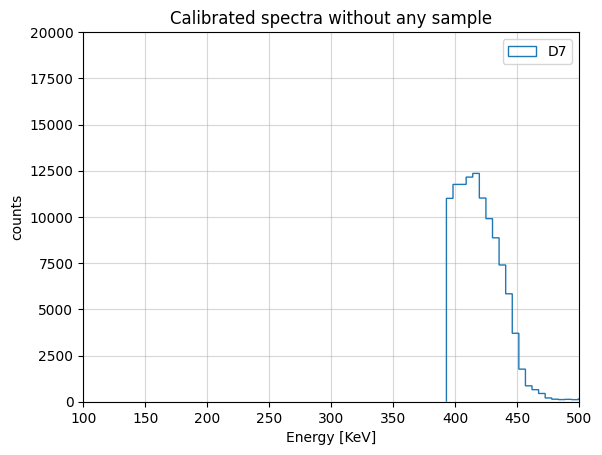

In [185]:
# plt.hist(hm_d1_def, bins=int(hm_d1.max()), histtype='step', label='D1')
# plt.hist(hm_d2_def, bins=int(hm_d2.max()), histtype='step', label='D2')
# plt.hist(hm_d3_def, bins=int(hm_d3.max()), histtype='step', label='D3')
# plt.hist(hm_d4_def, bins=int(hm_d4.max()), histtype='step', label='D4')
# plt.hist(hm_d5_def, bins=int(hm_d5.max()), histtype='step', label='D5')
# plt.hist(hm_d6_def, bins=int(hm_d6.max()), histtype='step', label='D6')
plt.hist(hm_d7_def, bins=int(hm_d7.max()), histtype='step', label='D7')
# plt.hist(hm_d8_def, bins=int(hm_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra without any sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 20000)
plt.xlim(100, 500)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [188]:
fit_hm_d1 = bbb.normal(hm_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(hm_d1_def.max()/10), n=k)
fit_hm_d2 = bbb.normal(hm_d2_def, xmin=400, xmax=600, x1=0, x2=1000, b=int(hm_d2_def.max()/10), n=k)
fit_hm_d3 = bbb.normal(hm_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(hm_d3_def.max()/10), n=k)
fit_hm_d4 = bbb.normal(hm_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(hm_d4_def.max()/10), n=k)
fit_hm_d5 = bbb.normal(hm_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(hm_d5_def.max()/10), n=k)
fit_hm_d6 = bbb.normal(hm_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(hm_d6_def.max()/10), n=k)
fit_hm_d7 = bbb.normal(hm_d7_def, xmin=400, xmax=500, x1=0, x2=1000, b=int(hm_d7_def.max()/10), n=k)
fit_hm_d8 = bbb.normal(hm_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(hm_d8_def.max()/10), n=k)

#integrals dal det2 al det6
hm_int = np.array([fit_hm_d2[5][0], fit_hm_d3[5][0], fit_hm_d4[5][0], fit_hm_d5[5][0], fit_hm_d6[5][0], fit_hm_d7[5][0], fit_hm_d8[5][0]])
hm_int_err = np.array([fit_hm_d2[5][1], fit_hm_d3[5][1], fit_hm_d4[5][1], fit_hm_d5[5][1], fit_hm_d6[5][1], fit_hm_d7[5][1], fit_hm_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1612621.0065103008 ± 20039.73710071498
Media = 534.7886158739352 ± 0.9471695547635939
Sigma = 68.54831610044945 ± 1.0424603162985209
Chi-quadro = 530.9038288623824
Chi-quadro ridotto = 22.120992869265933
Integrale dell'istogramma nel range [466.24029977348573, 603.3369319743847] = 112006 ± 334
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 41630.99035785379 ± 1788.9009217306852
Media = 482.8124325119869 ± 3.0666340557442484
Sigma = 84.32704768872586 ± 4.631234016107298
Chi-quadro = 20.65011634940071
Chi-quadro ridotto = 1.214712726435336
Integrale dell'istogramma nel range [398.48538482326103, 567.1394802007128] = 2850 ± 53
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 242423.85700167003 ± 7042.565848576224
Media = 497.10987167269326 ± 2.5792018558076304
Sigma = 83.9649609834854 ± 3.109109067541866
Chi-quadro = 252.93307697543435
Chi-q

## PIOMBO

In [156]:
piombo_d1 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d2 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d3 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d4 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d5 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d6 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d7 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d8 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')

In [157]:
pb_d1 = np.asarray(piombo_d1['Data_R;1']['Energy'].array())
pb_d1_calib = pb_d1*calibrazioneD1[0]+calibrazioneD1[1]
pb_d1_def = pb_d1_calib[pb_d1_calib != 0]

pb_d2 = np.asarray(piombo_d2['Data_R;1']['Energy'].array())
pb_d2_calib = pb_d2*calibrazioneD2[0]+calibrazioneD2[1]
pb_d2_def = pb_d2_calib[pb_d2_calib != 0]

pb_d3 = np.asarray(piombo_d3['Data_R;1']['Energy'].array())
pb_d3_calib = pb_d3 * calibrazioneD3[0] + calibrazioneD3[1]
pb_d3_def = pb_d3_calib[pb_d3_calib != 0]

pb_d4 = np.asarray(piombo_d4['Data_R;1']['Energy'].array())
pb_d4_calib = pb_d4 * calibrazioneD4[0] + calibrazioneD4[1]
pb_d4_def = pb_d4_calib[pb_d4_calib != 0]

pb_d5 = np.asarray(piombo_d5['Data_R;1']['Energy'].array())
pb_d5_calib = pb_d5 * calibrazioneD5[0] + calibrazioneD5[1]
pb_d5_def = pb_d5_calib[pb_d5_calib != 0]

pb_d6 = np.asarray(piombo_d6['Data_R;1']['Energy'].array())
pb_d6_calib = pb_d6 * calibrazioneD6[0] + calibrazioneD6[1]
pb_d6_def = pb_d6_calib[pb_d6_calib != 0]

pb_d7 = np.asarray(piombo_d7['Data_R;1']['Energy'].array())
pb_d7_calib = pb_d7 * calibrazioneD7[0] + calibrazioneD7[1]
pb_d7_def = pb_d7_calib[pb_d7_calib != 0]

pb_d8 = np.asarray(piombo_d8['Data_R;1']['Energy'].array())
pb_d8_calib = pb_d8 * calibrazioneD8[0] + calibrazioneD8[1]
pb_d8_def = pb_d8_calib[pb_d8_calib != 0]

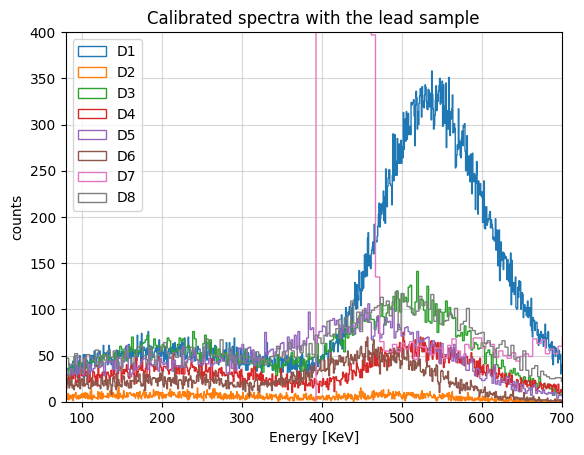

In [158]:
plt.hist(pb_d1_def, bins=int(pb_d1.max()), histtype='step', label='D1')
plt.hist(pb_d2_def, bins=int(pb_d2.max()), histtype='step', label='D2')
plt.hist(pb_d3_def, bins=int(pb_d3.max()), histtype='step', label='D3')
plt.hist(pb_d4_def, bins=int(pb_d4.max()), histtype='step', label='D4')
plt.hist(pb_d5_def, bins=int(pb_d5.max()), histtype='step', label='D5')
plt.hist(pb_d6_def, bins=int(pb_d6.max()), histtype='step', label='D6')
plt.hist(pb_d7_def, bins=int(pb_d7.max()), histtype='step', label='D7')
plt.hist(pb_d8_def, bins=int(pb_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the lead sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 400)
plt.xlim(80, 700)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [159]:
fit_pb_d1 = bbb.normal(pb_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(pb_d1_def.max()/10), n=k)
fit_pb_d2 = bbb.normal(pb_d2_def, xmin=380, xmax=600, x1=0, x2=1000, b=int(pb_d2_def.max()/10), n=k)
fit_pb_d3 = bbb.normal(pb_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(pb_d3_def.max()/10), n=k)
fit_pb_d4 = bbb.normal(pb_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(pb_d4_def.max()/10), n=k)
fit_pb_d5 = bbb.normal(pb_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(pb_d5_def.max()/10), n=k)
fit_pb_d6 = bbb.normal(pb_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(pb_d6_def.max()/10), n=k)
fit_pb_d7 = bbb.normal(pb_d7_def, xmin=380, xmax=650, x1=0, x2=1000, b=int(pb_d7_def.max()/10), n=k)
fit_pb_d8 = bbb.normal(pb_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(pb_d8_def.max()/10), n=k)

#integrals dal det2 al det6
pb_int = np.array([fit_pb_d2[5][0], fit_pb_d3[5][0], fit_pb_d4[5][0], fit_pb_d5[5][0], fit_pb_d6[5][0], fit_pb_d7[5][0], fit_pb_d8[5][0]])
pb_int_err = np.array([fit_pb_d2[5][1], fit_pb_d3[5][1], fit_pb_d4[5][1], fit_pb_d5[5][1], fit_pb_d6[5][1], fit_pb_d7[5][1], fit_pb_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 737353.6534332427 ± 9001.702040544018
Media = 540.7054064306845 ± 0.9369330363576598
Sigma = 69.21224419123274 ± 1.037630952494925
Chi-quadro = 208.9169026182588
Chi-quadro ridotto = 8.70487094242745
Integrale dell'istogramma nel range [471.4931622394518, 609.9176506219173] = 50867 ± 225
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 23449.92899420721 ± 1078.626918928082
Media = 487.70849646835467 ± 3.431935251369109
Sigma = 82.75213625704949 ± 5.010787956618215
Chi-quadro = 26.06781686700461
Chi-quadro ridotto = 1.3719903614212952
Integrale dell'istogramma nel range [404.9563602113052, 570.4606327254041] = 1632 ± 40
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 108946.06697312849 ± 4110.58404457172
Media = 503.57496065973834 ± 3.391883357915347
Sigma = 86.20868200812997 ± 4.17436188040077
Chi-quadro = 180.6814453633857
Chi-quadro rido

In [160]:
hm_int.shape

(7,)

In [161]:
#CALCOLO COEFFICIENTE ATTENUAZIONE PIOMBO
rho_pb = 0.01134 #g/mm^3
mu_pb = -(np.log(pb_int/hm_int))/(x_eff*rho_pb) #mm^2/g
mu_pb_err = 1/(x_eff*rho_pb) * np.sqrt((pb_int_err/pb_int)**2 + (hm_int_err/hm_int)**2)

#compatibilità tra di loro
pb_compat_crossed = np.zeros((7, 7), dtype=object)
for i in range(len(mu_pb)):
    for j in range(len(mu_pb)):
        if j == i:
            pb_compat_crossed[i, j] = ''
        else:
            pb_compat_crossed[i, j] = np.abs(mu_pb[i]-mu_pb[j])/np.sqrt(mu_pb_err[i]**2 + mu_pb_err[j]**2)

labels = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
df = pd.DataFrame(pb_compat_crossed, index=labels, columns=labels) #Creazione di un DataFrame per una rappresentazione tabellare
print(df)

#Compatibilità con il valore vero
mu_atteso = 16.13 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1
pb_compat = np.abs(mu_pb-mu_atteso)/mu_pb_err
print('\n')
for i in range(len(mu_pb)):
    if i == 0:
        print(f'mu{i+2} = 0{mu_pb[i]:.2f} ± {mu_pb_err[i]:.2f} mm⁻¹ \t compatibilità con il valore atteso: {pb_compat[i]}')
    else:
        print(f'mu{i+2} = {mu_pb[i]:.2f} ± {mu_pb_err[i]:.2f} mm⁻¹ \t compatibilità con il valore atteso: {pb_compat[i]}')



          d2        d3        d4        d5        d6        d7        d8
d2            8.218571  8.341635  6.929136  7.850372  5.053669  7.665829
d3  8.218571            0.240115  2.169356  0.550037  7.816548  0.576932
d4  8.341635  0.240115            2.394433   0.78329  8.038643  0.798412
d5  6.929136  2.169356  2.394433            1.590641  4.968777  1.454514
d6  7.850372  0.550037   0.78329  1.590641            6.926638  0.054375
d7  5.053669  7.816548  8.038643  4.968777  6.926638            6.293784
d8  7.665829  0.576932  0.798412  1.454514  0.054375  6.293784          


mu2 = 09.56 ± 0.53 mm⁻¹ 	 compatibilità con il valore atteso: 12.452822952732845
mu3 = 14.33 ± 0.24 mm⁻¹ 	 compatibilità con il valore atteso: 7.385133250814922
mu4 = 14.42 ± 0.25 mm⁻¹ 	 compatibilità con il valore atteso: 6.948501390810038
mu5 = 13.59 ± 0.24 mm⁻¹ 	 compatibilità con il valore atteso: 10.427403696331622
mu6 = 14.14 ± 0.25 mm⁻¹ 	 compatibilità con il valore atteso: 7.955613837311472
mu7 = 12.28 

# black box

In [162]:
#posizione 1
d2_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d3_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d4_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d5_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d6_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d7_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')
d8_pos1 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000forward_POS1\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000forward_POS1.root')

#posizione 2
d2_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d3_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d4_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d5_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d6_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d7_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')
d8_pos2 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500forward_POS2\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500forward_POS2.root')

#posizione 3
d2_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d3_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d4_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d5_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d6_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d7_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')
d8_pos3 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500forward_POS3.root')

#posizione 4
d2_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d3_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d4_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d5_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d6_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d7_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')
d8_pos4 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500forward_POS4.root')

#posizione 5
# d2_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH1@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d3_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH2@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d4_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH3@DT5720B_781_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d5_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH0@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d6_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH1@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d7_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH2@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')
# d8_pos5 = uproot.open('data_imaging\\group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5\\RAW\\DataR_CH3@DT5720B_467_group23_15min_blackbox_10500+10000+3000+10500+10500+9500+10000forward_POS5.root')

In [163]:
# d3_1 = np.asarray(d3_pos1['Data_R;1']['Energy'].array())
# d3_2 = np.asarray(d3_pos2['Data_R;1']['Energy'].array())
# d3_3 = np.asarray(d3_pos3['Data_R;1']['Energy'].array())
# d3_4 = np.asarray(d3_pos4['Data_R;1']['Energy'].array())
# plt.hist(hm_d3_def, bins=int(hm_d3.max()), histtype='step', label='home')
# plt.hist(d3_1, bins=int(d3_1.max()), histtype='step', label='pos1')
# plt.hist(d3_2, bins=int(d3_2.max()), histtype='step', label='pos2')
# plt.hist(d3_3, bins=int(d3_3.max()), histtype='step', label='pos3')
# plt.hist(d3_4, bins=int(d3_4.max()), histtype='step', label='pos4')
# plt.xlabel('ADC channels')
# plt.ylabel('counts')
# plt.title('Uncalibrated spectra of the D3 detector with box')
# plt.xlim(0, 100)
# plt.ylim(0, 30000)
# plt.legend()
# plt.grid(alpha=0.5)
# plt.show()

In [164]:
#creazione array adc channels
d2_1 = np.asarray(d2_pos1['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_2 = np.asarray(d2_pos2['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_3 = np.asarray(d2_pos3['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
d2_4 = np.asarray(d2_pos4['Data_R;1']['Energy'].array() * calibrazioneD2[0] + calibrazioneD2[1])
  
 
d3_1 = np.asarray(d3_pos1['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_2 = np.asarray(d3_pos2['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_3 = np.asarray(d3_pos3['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_4 = np.asarray(d3_pos4['Data_R;1']['Energy'].array() * calibrazioneD3[0] + calibrazioneD3[1])
d3_box_calib = [d3_1, d3_2, d3_3, d3_4 ]  
 
d4_1 = np.asarray(d4_pos1['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_2 = np.asarray(d4_pos2['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_3 = np.asarray(d4_pos3['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_4 = np.asarray(d4_pos4['Data_R;1']['Energy'].array() * calibrazioneD4[0] + calibrazioneD4[1])
d4_box_calib = [d4_1, d4_2, d4_3, d4_4 ]  
 
d5_1 = np.asarray(d5_pos1['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_2 = np.asarray(d5_pos2['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_3 = np.asarray(d5_pos3['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_4 = np.asarray(d5_pos4['Data_R;1']['Energy'].array() * calibrazioneD5[0] + calibrazioneD5[1])
d5_box_calib = [d5_1, d5_2, d5_3, d5_4 ]  
 
d6_1 = np.asarray(d6_pos1['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_2 = np.asarray(d6_pos2['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_3 = np.asarray(d6_pos3['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_4 = np.asarray(d6_pos4['Data_R;1']['Energy'].array() * calibrazioneD6[0] + calibrazioneD6[1])
d6_box_calib = [d6_1, d6_2, d6_3, d6_4 ]  
 
d7_1 = np.asarray(d7_pos1['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_2 = np.asarray(d7_pos2['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_3 = np.asarray(d7_pos3['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_4 = np.asarray(d7_pos4['Data_R;1']['Energy'].array() * calibrazioneD7[0] + calibrazioneD7[1])
d7_box_calib = [d7_1, d7_2, d7_3, d7_4 ]  
 
d8_1 = np.asarray(d8_pos1['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_2 = np.asarray(d8_pos2['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_3 = np.asarray(d8_pos3['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_4 = np.asarray(d8_pos4['Data_R;1']['Energy'].array() * calibrazioneD8[0] + calibrazioneD8[1])
d8_box_calib = [d8_1, d8_2, d8_3, d8_4]


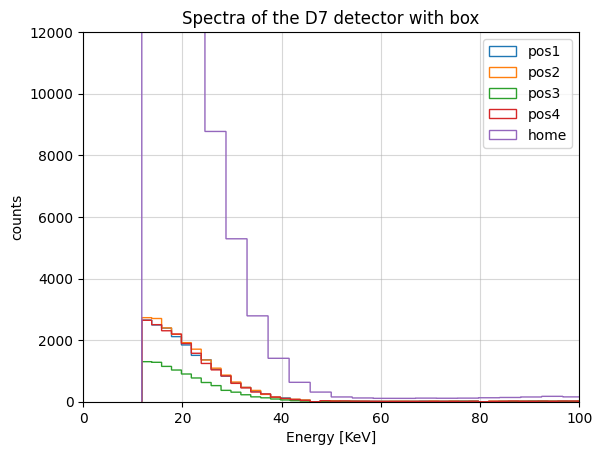

In [165]:
plt.hist(d3_1, bins=int(d3_1.max()/2), histtype='step', label='pos1')
plt.hist(d3_2, bins=int(d3_2.max()/2), histtype='step', label='pos2')
plt.hist(d3_3, bins=int(d3_3.max()/2), histtype='step', label='pos3')
plt.hist(d3_4, bins=int(d3_4.max()/2), histtype='step', label='pos4')
plt.hist(hm_d3_def, bins=int(hm_d3.max()/2), histtype='step', label='home')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectra of the D7 detector with box')
plt.xlim(0, 100)
plt.ylim(0, 12000)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [166]:
def hist_and_sum(data, bins, xmin, xmax):
    counts, edges = np.histogram(data, bins=bins)
    # Calcolo del centro dei bin
    bin_centers = (edges[:-1] + edges[1:]) / 2
    # Filtra i bin che rientrano nel range
    mask = (bin_centers >= xmin) & (bin_centers <= xmax)
    sum_counts = np.sum(counts[mask])
    sum_err = np.sqrt(np.sum(counts[mask]**2))

    return sum_counts, sum_err


In [167]:
d2_hm_com = hist_and_sum(hm_d2_def, bins=int(hm_d2_def.max()), xmin=20, xmax=35)
d2_1_fit = hist_and_sum(d2_1, bins=int(d2_1.max()), xmin=20, xmax=35)
d2_2_fit = hist_and_sum(d2_1, bins=int(d2_1.max()), xmin=20, xmax=35)
d2_3_fit = hist_and_sum(d2_1, bins=int(d2_1.max()), xmin=20, xmax=35)
d2_4_fit = hist_and_sum(d2_1, bins=int(d2_1.max()), xmin=20, xmax=35)
d2_box = np.array([2*d2_1_fit[0]/d2_hm_com[0], 2*d2_2_fit[0]/d2_hm_com[0], 2*d2_3_fit[0]/d2_hm_com[0], 2*d2_4_fit[0]/d2_hm_com[0]])

d3_hm_com = hist_and_sum(hm_d3_def, bins=int(hm_d3_def.max()), xmin=12, xmax=40)
d3_1_fit = hist_and_sum(d3_1, bins=int(d3_1.max()), xmin=12, xmax=40)
d3_2_fit = hist_and_sum(d3_1, bins=int(d3_1.max()), xmin=12, xmax=40)
d3_3_fit = hist_and_sum(d3_1, bins=int(d3_1.max()), xmin=12, xmax=40)
d3_4_fit = hist_and_sum(d3_1, bins=int(d3_1.max()), xmin=12, xmax=40)
d3_box = np.array([2*d3_1_fit[0]/d3_hm_com[0], 2*d3_3_fit[0]/d3_hm_com[0], 2*d3_3_fit[0]/d3_hm_com[0], 2*d3_4_fit[0]/d3_hm_com[0]])

d4_hm_com = hist_and_sum(hm_d4_def, bins=int(hm_d4_def.max()), xmin=30, xmax=45)
d4_1_fit = hist_and_sum(d4_1, bins=int(d4_1.max()), xmin=30, xmax=45)
d4_2_fit = hist_and_sum(d4_1, bins=int(d4_1.max()), xmin=30, xmax=45)
d4_3_fit = hist_and_sum(d4_1, bins=int(d4_1.max()), xmin=30, xmax=45)
d4_4_fit = hist_and_sum(d4_1, bins=int(d4_1.max()), xmin=30, xmax=45)
d4_box = np.array([2*d4_1_fit[0]/d4_hm_com[0], 2*d4_3_fit[0]/d4_hm_com[0], 2*d4_3_fit[0]/d4_hm_com[0], 2*d4_4_fit[0]/d4_hm_com[0]]) 

d5_hm_com = hist_and_sum(hm_d5_def, bins=int(hm_d5_def.max()), xmin=32, xmax=40)
d5_1_fit = hist_and_sum(d5_1, bins=int(d5_1.max()), xmin=32, xmax=40)
d5_2_fit = hist_and_sum(d5_1, bins=int(d5_1.max()), xmin=32, xmax=40)
d5_3_fit = hist_and_sum(d5_1, bins=int(d5_1.max()), xmin=32, xmax=40)
d5_4_fit = hist_and_sum(d5_1, bins=int(d5_1.max()), xmin=32, xmax=40)
d5_box = np.array([2*d5_1_fit[0]/d5_hm_com[0], 2*d5_3_fit[0]/d5_hm_com[0], 2*d5_3_fit[0]/d5_hm_com[0], 2*d5_4_fit[0]/d5_hm_com[0]]) 

d6_hm_com = hist_and_sum(hm_d6_def, bins=int(hm_d6_def.max()), xmin=50, xmax=60)
d6_1_fit = hist_and_sum(d6_1, bins=int(d6_1.max()), xmin=50, xmax=60)
d6_2_fit = hist_and_sum(d6_1, bins=int(d6_1.max()), xmin=50, xmax=60)
d6_3_fit = hist_and_sum(d6_1, bins=int(d6_1.max()), xmin=50, xmax=60)
d6_4_fit = hist_and_sum(d6_1, bins=int(d6_1.max()), xmin=50, xmax=60)
d6_box = np.array([2*d6_1_fit[0]/d6_hm_com[0], 2*d6_3_fit[0]/d6_hm_com[0], 2*d6_3_fit[0]/d6_hm_com[0], 2*d6_4_fit[0]/d6_hm_com[0]]) 

d7_hm_com = hist_and_sum(hm_d7_def, bins=int(hm_d7_def.max()), xmin=-65, xmax=-20)
d7_1_fit = hist_and_sum(d7_1, bins=int(d7_1.max()), xmin=-65, xmax=-20)
d7_2_fit = hist_and_sum(d7_1, bins=int(d7_1.max()), xmin=-65, xmax=-20)
d7_3_fit = hist_and_sum(d7_1, bins=int(d7_1.max()), xmin=-65, xmax=-20)
d7_4_fit = hist_and_sum(d7_1, bins=int(d7_1.max()), xmin=-65, xmax=-20)
d7_box = np.array([2*d7_1_fit[0]/d7_hm_com[0], 2*d7_2_fit[0]/d7_hm_com[0], 2*d7_3_fit[0]/d7_hm_com[0], 2*d7_4_fit[0]/d7_hm_com[0]])

d8_hm_com = hist_and_sum(hm_d8_def, bins=int(hm_d8_def.max()), xmin=20, xmax=45)
d8_1_fit = hist_and_sum(d8_1, bins=int(d8_1.max()), xmin=20, xmax=45)
d8_2_fit = hist_and_sum(d8_1, bins=int(d8_1.max()), xmin=20, xmax=45)
d8_3_fit = hist_and_sum(d8_1, bins=int(d8_1.max()), xmin=20, xmax=45)
d8_4_fit = hist_and_sum(d8_1, bins=int(d8_1.max()), xmin=20, xmax=45)
d8_box = np.array([2*d8_1_fit[0]/d8_hm_com[0], 2*d8_2_fit[0]/d8_hm_com[0], 2*d8_3_fit[0]/d8_hm_com[0], 2*d8_4_fit[0]/d8_hm_com[0]])

C:\Users\Utente\AppData\Local\Temp\ipykernel_17104\3283628003.py:41: RuntimeWarning: invalid value encountered in scalar divide
  d7_box = np.array([2*d7_1_fit[0]/d7_hm_com[0], 2*d7_2_fit[0]/d7_hm_com[0], 2*d7_3_fit[0]/d7_hm_com[0], 2*d7_4_fit[0]/d7_hm_com[0]])


In [168]:
'''data = np.array([d2_box, d3_box, d4_box, d5_box, d6_box, d7_box, d8_box])  # Sostituisci con i tuoi dati reali

# Crea la heatmap
plt.figure(figsize=(6, 6))
plt.imshow(data, cmap='viridis', aspect='auto')

# Aggiungi etichette agli assi
plt.xlabel('Column in the Box', fontsize=13)
plt.ylabel('Detectors', fontsize=13)
plt.title('Intensities normalized to the home measurement', fontsize=13)

# Aggiungi i nomi dei detector (da D2 a D8)
plt.yticks(ticks=np.arange(7), labels=[f'D{i}' for i in range(2, 9)])
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5])


# Aggiungi una barra di colore
cbar = plt.colorbar()
cbar.set_label(r'I/I$_0$', fontsize=14)
cbar.ax.tick_params(labelsize=10)

# Mostra il grafico
plt.tight_layout()
plt.show()'''

"data = np.array([d2_box, d3_box, d4_box, d5_box, d6_box, d7_box, d8_box])  # Sostituisci con i tuoi dati reali\n\n# Crea la heatmap\nplt.figure(figsize=(6, 6))\nplt.imshow(data, cmap='viridis', aspect='auto')\n\n# Aggiungi etichette agli assi\nplt.xlabel('Column in the Box', fontsize=13)\nplt.ylabel('Detectors', fontsize=13)\nplt.title('Intensities normalized to the home measurement', fontsize=13)\n\n# Aggiungi i nomi dei detector (da D2 a D8)\nplt.yticks(ticks=np.arange(7), labels=[f'D{i}' for i in range(2, 9)])\nplt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5])\n\n\n# Aggiungi una barra di colore\ncbar = plt.colorbar()\ncbar.set_label(r'I/I$_0$', fontsize=14)\ncbar.ax.tick_params(labelsize=10)\n\n# Mostra il grafico\nplt.tight_layout()\nplt.show()"

In [169]:
d2_hm_com  = bbb.compton_curvefit(hm_d2_def, b=int(hm_d2_def.max()), xmin=22, xmax=28, x1=20, x2=40, n=2)
d2_1_fit = bbb.compton_curvefit(d2_1, b=int(d2_1.max()), xmin=22, xmax=28, x1=20, x2=40, n=2)
d2_2_fit = bbb.compton_curvefit(d2_2, b=int(d2_2.max()), xmin=22, xmax=28, x1=20, x2=40, n=2)
d2_3_fit = bbb.compton_curvefit(d2_3, b=int(d2_3.max()), xmin=22, xmax=28, x1=20, x2=40, n=2)
d2_4_fit = bbb.compton_curvefit(d2_4, b=int(d2_4.max()), xmin=22, xmax=28, x1=20, x2=40, n=2)
d2_box = np.array([2*d2_1_fit[2][0]/d2_hm_com[2][0], 2*d2_2_fit[2][0]/d2_hm_com[2][0], 2*d2_3_fit[2][0]/d2_hm_com[2][0], 2*d2_4_fit[2][0]/d2_hm_com[2][0]])

d3_hm_com  = bbb.compton_curvefit(hm_d3_def, b=int(hm_d3_def.max()/2), xmin=12, xmax=25, x1=10, x2=40, n=2)
d3_1_fit = bbb.compton_curvefit(d3_1, b=int(d3_1.max()/2), xmin=12, xmax=25, x1=10, x2=40, n=2)
d3_2_fit = bbb.compton_curvefit(d3_2, b=int(d3_2.max()/2), xmin=12, xmax=25, x1=10, x2=40, n=2)
d3_3_fit = bbb.compton_curvefit(d3_3, b=int(d3_3.max()/2), xmin=12, xmax=25, x1=10, x2=40, n=2)
d3_4_fit = bbb.compton_curvefit(d3_4, b=int(d3_4.max()/2), xmin=12, xmax=25, x1=10, x2=40, n=2)
d3_box = np.array([2*d3_1_fit[2][0]/d3_hm_com[2][0], 2*d3_2_fit[2][0]/d3_hm_com[2][0], 2*d3_3_fit[2][0]/d3_hm_com[2][0], 2*d3_4_fit[2][0]/d3_hm_com[2][0]])

d4_hm_com  = bbb.compton_curvefit(hm_d4_def, b=int(hm_d4_def.max()/2), xmin=30, xmax=42, x1=20, x2=50, n=2)
d4_1_fit = bbb.compton_curvefit(d4_1, b=int(d4_1.max()/2), xmin=30, xmax=42, x1=20, x2=50, n=2)
d4_2_fit = bbb.compton_curvefit(d4_2, b=int(d4_2.max()/2), xmin=30, xmax=42, x1=20, x2=50, n=2)
d4_3_fit = bbb.compton_curvefit(d4_3, b=int(d4_3.max()/2), xmin=30, xmax=42, x1=20, x2=50, n=2)
d4_4_fit = bbb.compton_curvefit(d4_4, b=int(d4_4.max()/2), xmin=30, xmax=42, x1=20, x2=50, n=2)
d4_box = np.array([2*d4_1_fit[2][0]/d4_hm_com[2][0], 2*d4_2_fit[2][0]/d4_hm_com[2][0], 2*d4_3_fit[2][0]/d4_hm_com[2][0], 2*d4_4_fit[2][0]/d4_hm_com[2][0]])

d5_hm_com  = bbb.compton_curvefit(hm_d5_def, b=int(hm_d5_def.max()/2), xmin=32, xmax=42, x1=20, x2=50, n=2)
d5_1_fit = bbb.compton_curvefit(d5_1, b=int(d5_1.max()/2), xmin=32, xmax=42, x1=20, x2=50, n=2)
d5_2_fit = bbb.compton_curvefit(d5_2, b=int(d5_2.max()/2), xmin=32, xmax=42, x1=20, x2=50, n=2)
d5_3_fit = bbb.compton_curvefit(d5_3, b=int(d5_3.max()/2), xmin=32, xmax=42, x1=20, x2=50, n=2)
d5_4_fit = bbb.compton_curvefit(d5_4, b=int(d5_4.max()/2), xmin=32, xmax=42, x1=20, x2=50, n=2)
d5_box = np.array([2*d5_1_fit[2][0]/d5_hm_com[2][0], 2*d5_2_fit[2][0]/d5_hm_com[2][0], 2*d5_3_fit[2][0]/d5_hm_com[2][0], 2*d5_4_fit[2][0]/d5_hm_com[2][0]])

d6_hm_com  = bbb.compton_curvefit(hm_d6_def, b=int(hm_d6_def.max()/2), xmin=53, xmax=65, x1=50, x2=80, n=2)
d6_1_fit = bbb.compton_curvefit(d6_1, b=int(d6_1.max()/2), xmin=53, xmax=65, x1=50, x2=80, n=2)
d6_2_fit = bbb.compton_curvefit(d6_2, b=int(d6_2.max()/2), xmin=53, xmax=65, x1=50, x2=80, n=2)
d6_3_fit = bbb.compton_curvefit(d6_3, b=int(d6_3.max()/2), xmin=53, xmax=65, x1=50, x2=80, n=2)
d6_4_fit = bbb.compton_curvefit(d6_4, b=int(d6_4.max()/2), xmin=53, xmax=65, x1=50, x2=80, n=2)
d6_box = np.array([2*d6_1_fit[2][0]/d6_hm_com[2][0], 2*d6_2_fit[2][0]/d6_hm_com[2][0], 2*d6_3_fit[2][0]/d6_hm_com[2][0], 2*d6_4_fit[2][0]/d6_hm_com[2][0]])

d7_hm_com  = bbb.compton_curvefit(hm_d7_def, b=int(hm_d7_def.max()/2), xmin=-65, xmax=-20, x1=50, x2=80, n=2)
d7_1_fit = bbb.compton_curvefit(d7_1, b=int(d7_1.max()/2), xmin=-65, xmax=-20, x1=-70, x2=0, n=2)
d7_2_fit = bbb.compton_curvefit(d7_2, b=int(d7_2.max()/2), xmin=-65, xmax=-20, x1=-70, x2=0, n=2)
d7_3_fit = bbb.compton_curvefit(d7_3, b=int(d7_3.max()/2), xmin=-65, xmax=-20, x1=-70, x2=0, n=2)
d7_4_fit = bbb.compton_curvefit(d7_4, b=int(d7_4.max()/2), xmin=-65, xmax=-20, x1=-70, x2=0, n=2)
d7_box = np.array([2*d7_1_fit[2][0]/d7_hm_com[2][0], 2*d7_2_fit[2][0]/d7_hm_com[2][0], 2*d7_3_fit[2][0]/d7_hm_com[2][0], 2*d7_4_fit[2][0]/d7_hm_com[2][0]])

d8_hm_com  = bbb.compton_curvefit(hm_d8_def, b=int(hm_d8_def.max()/3), xmin=21, xmax=36, x1=0, x2=60, n=2)
d8_1_fit = bbb.compton_curvefit(d8_1, b=int(d8_1.max()/3), xmin=21, xmax=36, x1=0, x2=60, n=2)
d8_2_fit = bbb.compton_minuit(d8_2, b=int(d8_2.max()/3), xmin=21, xmax=36, x1=0, x2=60, n=2)
d8_3_fit = bbb.compton_curvefit(d8_3, b=int(d8_3.max()/3), xmin=21, xmax=36, x1=0, x2=60, n=2)
d8_4_fit = bbb.compton_curvefit(d8_4, b=int(d8_4.max()/3), xmin=21, xmax=36, x1=0, x2=60, n=2)
d8_box = np.array([2*d8_1_fit[2][0]/d8_hm_com[2][0], 2*d8_2_fit[2][0]/d8_hm_com[2][0], 2*d8_3_fit[2][0]/d8_hm_com[2][0], 2*d8_4_fit[2][0]/d8_hm_com[2][0]])

Parametri ottimizzati con curve_fit:
mu = 24.08246056591507 ± 0.7397042659254197
sigma = 0.5400547694241739 ± 0.7511368481348941
rate = 7770.153309763132 ± 3796.7816579403625
bkg = 8512.014303988313 ± 2457.762024226145
Integrale dell'istogramma nel range [23.002351027066723, 25.162570104763418] = 31115 ± 176.39444435695813
Parametri ottimizzati con curve_fit:
mu = 24.01905586486006 ± 1.0073699361843342
sigma = 0.4375196661515379 ± 1.1457217420677248
rate = 1647.6717795512225 ± 811.3057510311127
bkg = 1879.6901979000381 ± 533.0319067107753
Integrale dell'istogramma nel range [23.144016532556986, 24.894095197163136] = 6636 ± 81.4616474176652
Parametri ottimizzati con curve_fit:
mu = 24.02955482382672 ± 1.1126522324298016
sigma = 0.421674769604931 ± 1.204269640605531
rate = 1650.8426703637208 ± 829.08409866393
bkg = 1928.328546118198 ± 548.4735706307696
Integrale dell'istogramma nel range [23.18620528461686, 24.872904363036582] = 6787 ± 82.38325072488945
Parametri ottimizzati con curve_fi

c:\Users\Utente\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Utente\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation maximum which has no identity

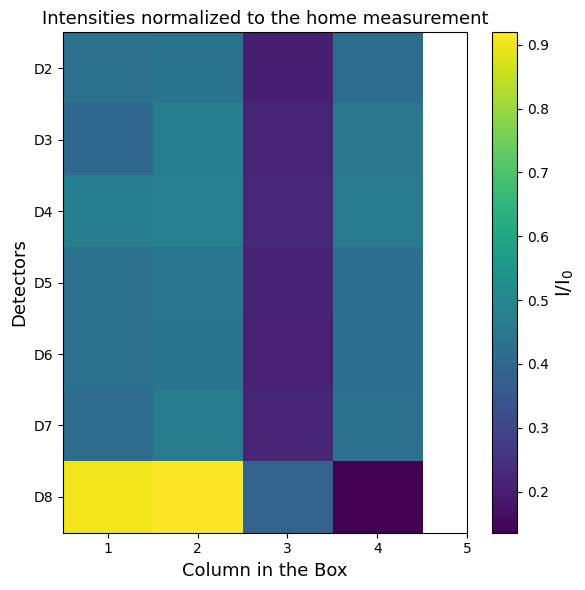

In [ ]:
data = np.array([d2_box, d3_box, d4_box, d5_box, d6_box, d7_box, d8_box])  # Sostituisci con i tuoi dati reali

# Crea la heatmap
plt.figure(figsize=(6, 6))
plt.imshow(data, cmap='viridis', aspect='auto')

# Aggiungi etichette agli assi
plt.xlabel('Column in the Box', fontsize=13)
plt.ylabel('Detectors', fontsize=13)
plt.title('Intensities normalized to the home measurement', fontsize=13)

# Aggiungi i nomi dei detector (da D2 a D8)
plt.yticks(ticks=np.arange(7), labels=[f'D{i}' for i in range(2, 9)])
plt.xticks(ticks=np.arange(5), labels=[1, 2, 3, 4, 5])


# Aggiungi una barra di colore
cbar = plt.colorbar()
cbar.set_label(r'I/I$_0$', fontsize=14)
cbar.ax.tick_params(labelsize=10)

# Mostra il grafico
plt.tight_layout()
plt.show()
